Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
tSZ signal through apeture photometry: 9.635502770217593e-06


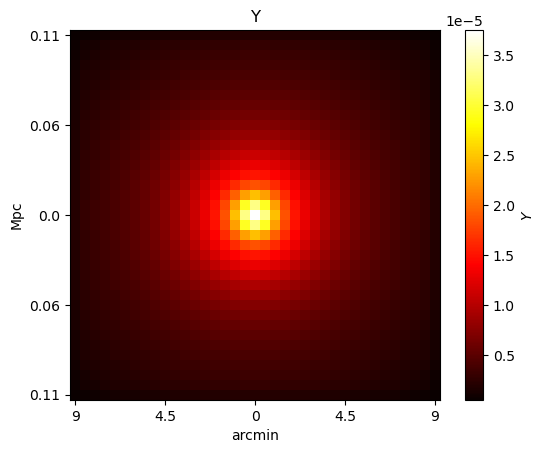

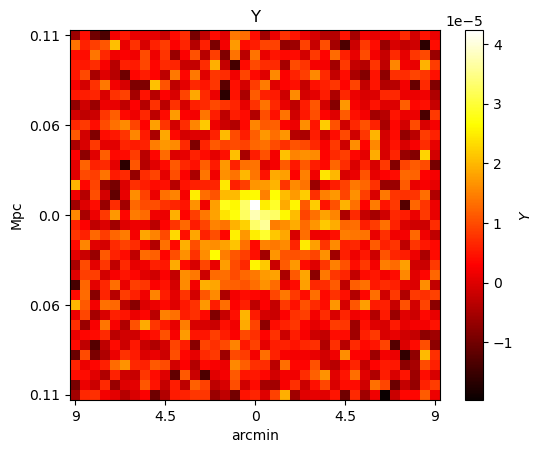

In [1]:
import simulation as sim
import numpy as np
import os
import shutil

#Load Cosmology
omega_m0, omega_b0, cosmo_h, sigma8, ns = sim.cosmo_para()

#Prepare directory to store simulated images
cwd = os.getcwd()
directory = 'test'
path = os.path.join(cwd, directory)
shutil.rmtree(path)
os.mkdir(path)

#Select options for images
num = [4, 8]

#Input Mass and Redshift
Mass = [5]
z = [0.01]

#Select Telescope and Observation Frequency
tele = 'SPT'
f = 150

#Retrieve Observation-related Parameters
beam_size, noise_level = sim.tele_para(tele, f)

#Converting to correct scale
f *= 1e9



for i in range(np.size(Mass)):
    
    Mass[i] *= 1e13
    radius = np.linspace(0.1, 9, 10)     #arcmin
    new_r = sim.arcmin_to_Mpc(radius, z[i])
    battaglia_pro = np.array([sim.battaglia_profile(r, Mass[i], z[i]) for r in new_r])
    y_pro = sim.epp_to_y(battaglia_pro)
    
    Map = sim.generate_img(radius, y_pro, f, noise_level, beam_size, z[i], AP = True)
    tsz_sig = sim.tSZ_signal(Map)
    print("tSZ signal through apeture photometry: " + str(tsz_sig))
    
    for j in range(np.size(num)):
        
        img = str(i)+str(num[j])+'.png'
        abs_path = os.path.join(path, img)
        sim.generate_img(radius, y_pro, f, noise_level, beam_size, z[i], option = num[j], p = abs_path)